<a href="https://colab.research.google.com/github/ykitaguchi77/YOLACT_Mobius/blob/main/yolov8_segmentation_validation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 26384, done.
remote: Counting objects: 100% (1040/1040), done.
remote: Compressing objects: 100% (590/590), done.
remote: Total 26384 (delta 625), reused 766 (delta 447), pack-reused 25344
Receiving objects: 100% (26384/26384), 15.65 MiB | 16.50 MiB/s, done.
Resolving deltas: 100% (18579/18579), done.
/content/ultralytics


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:

from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt")  # load a pretrained model (recommended for training)

results = model("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg",save=True)


image 1/1 /content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg: 384x640 1 canthus, 349.5ms
Speed: 17.0ms preprocess, 349.5ms inference, 1442.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/segment/predict


## セグメンテーションはできていそうです。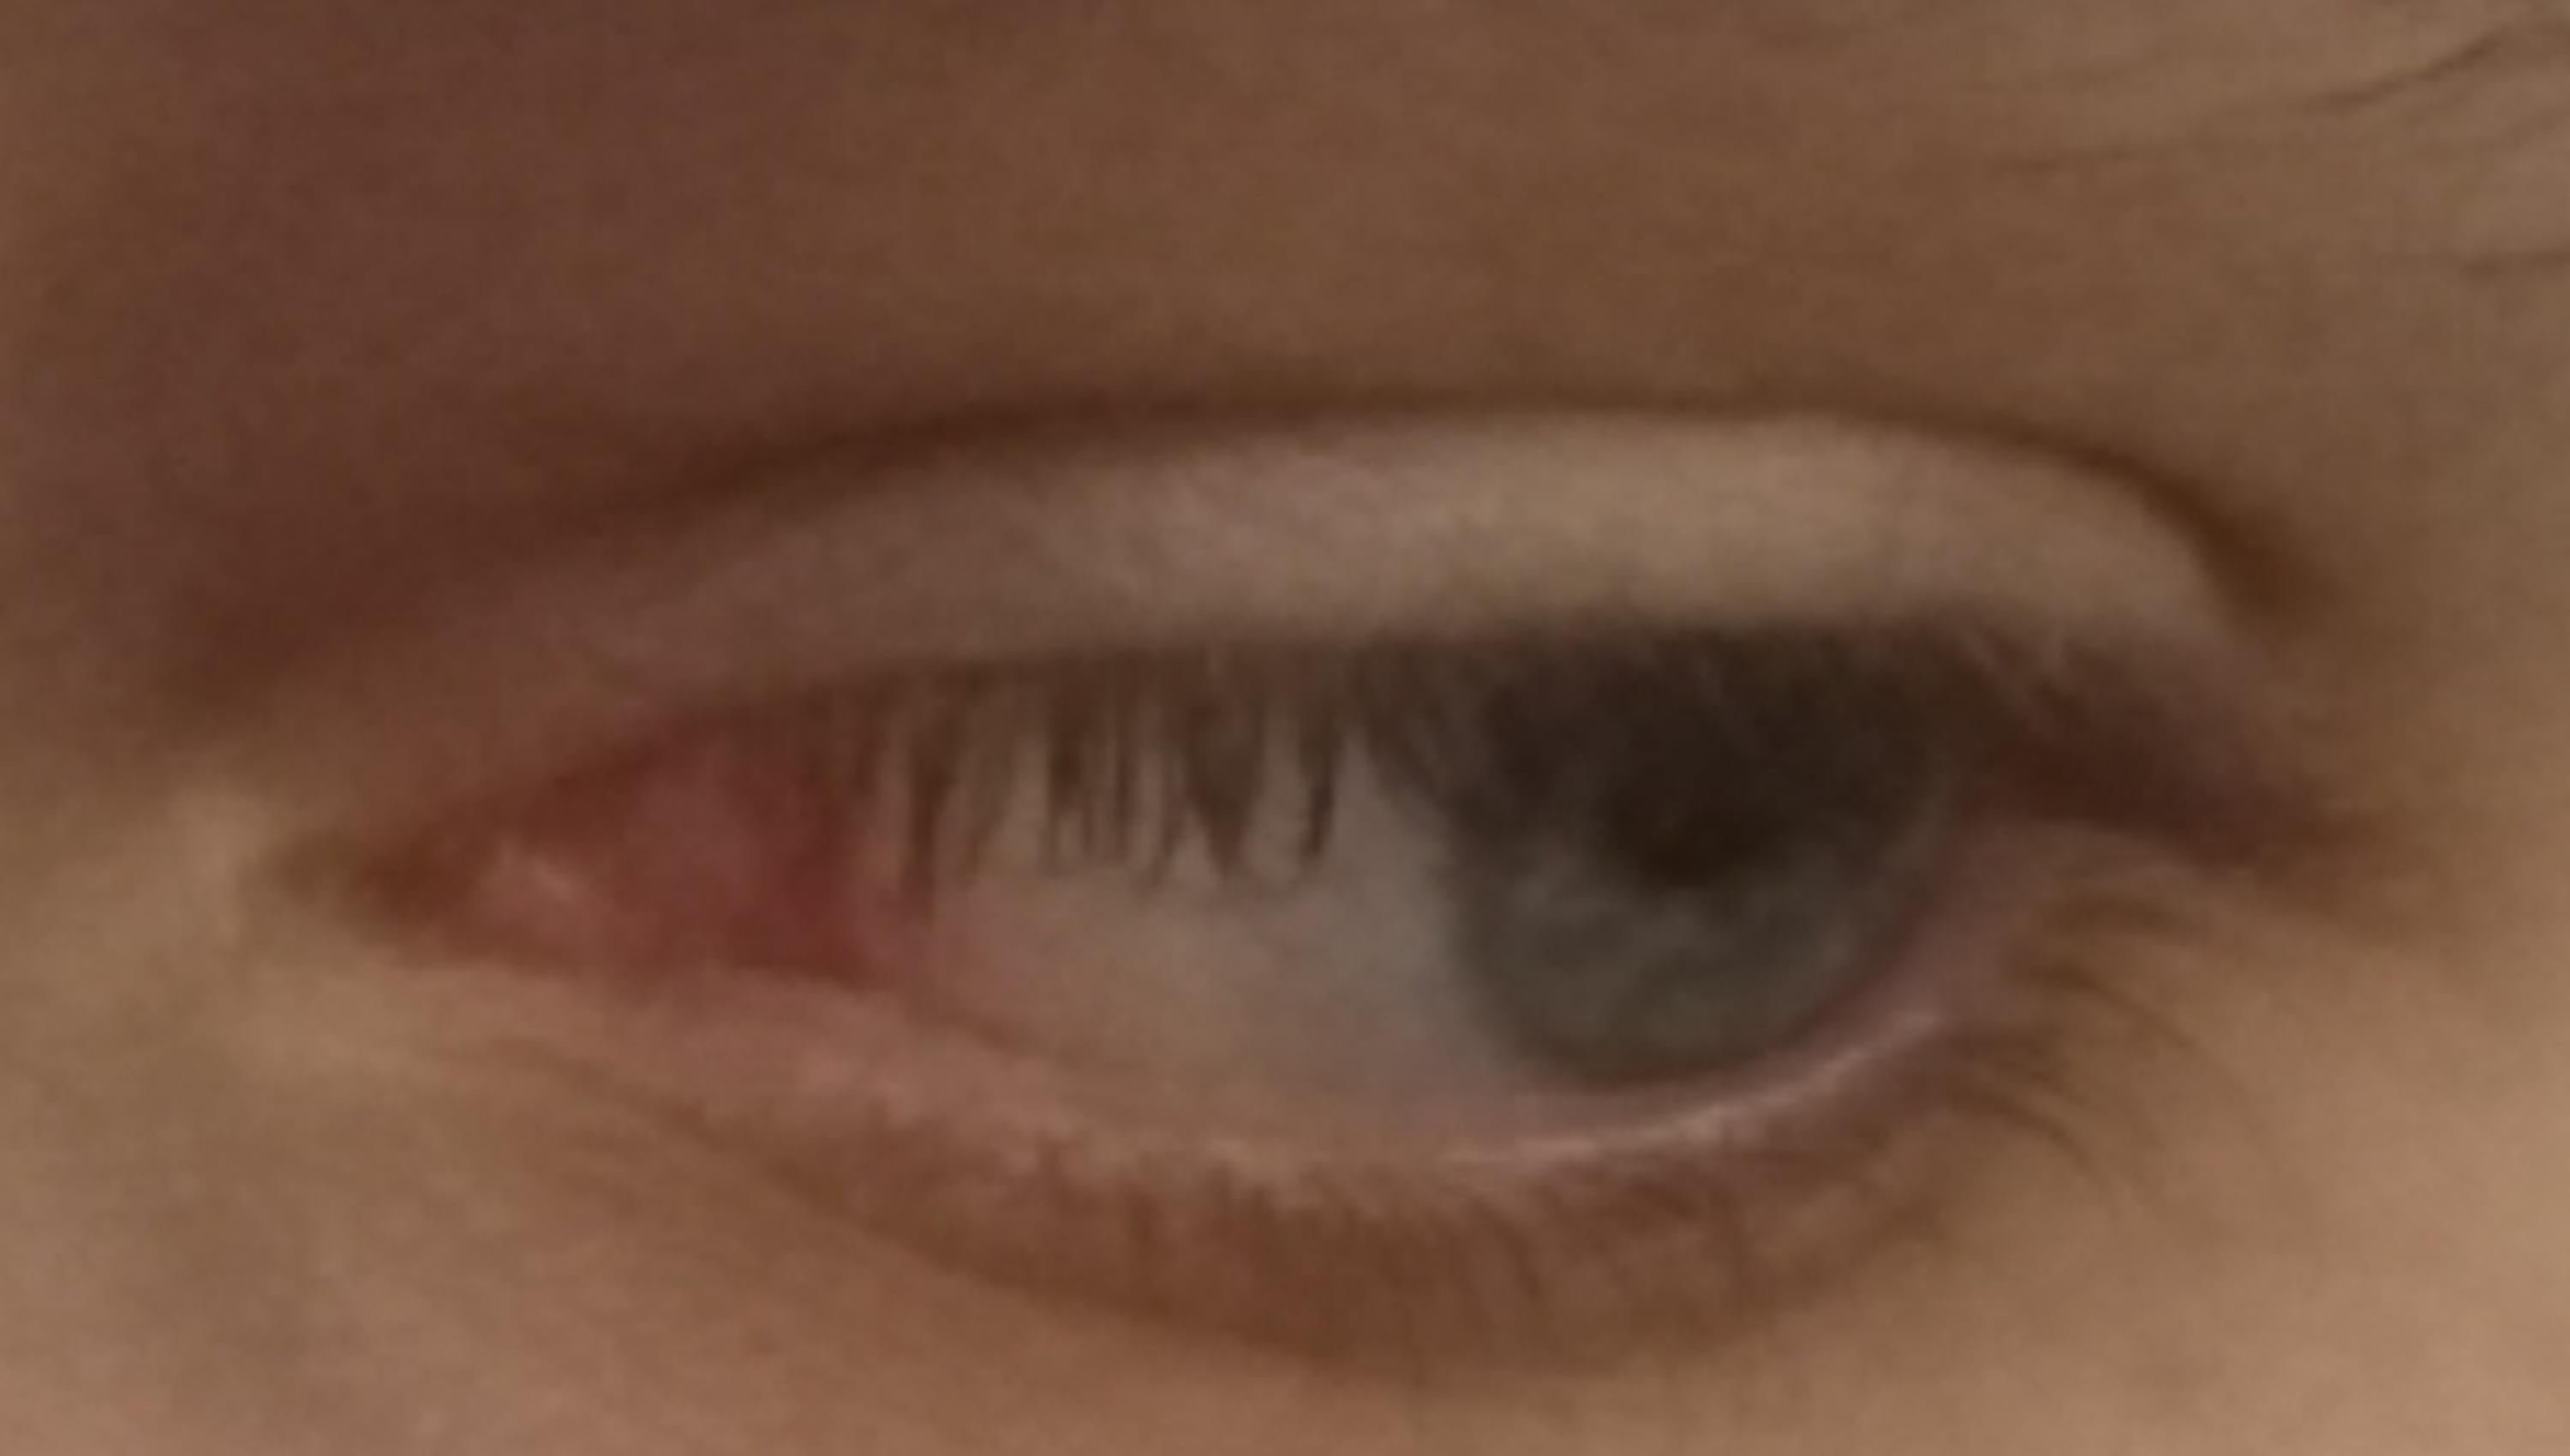

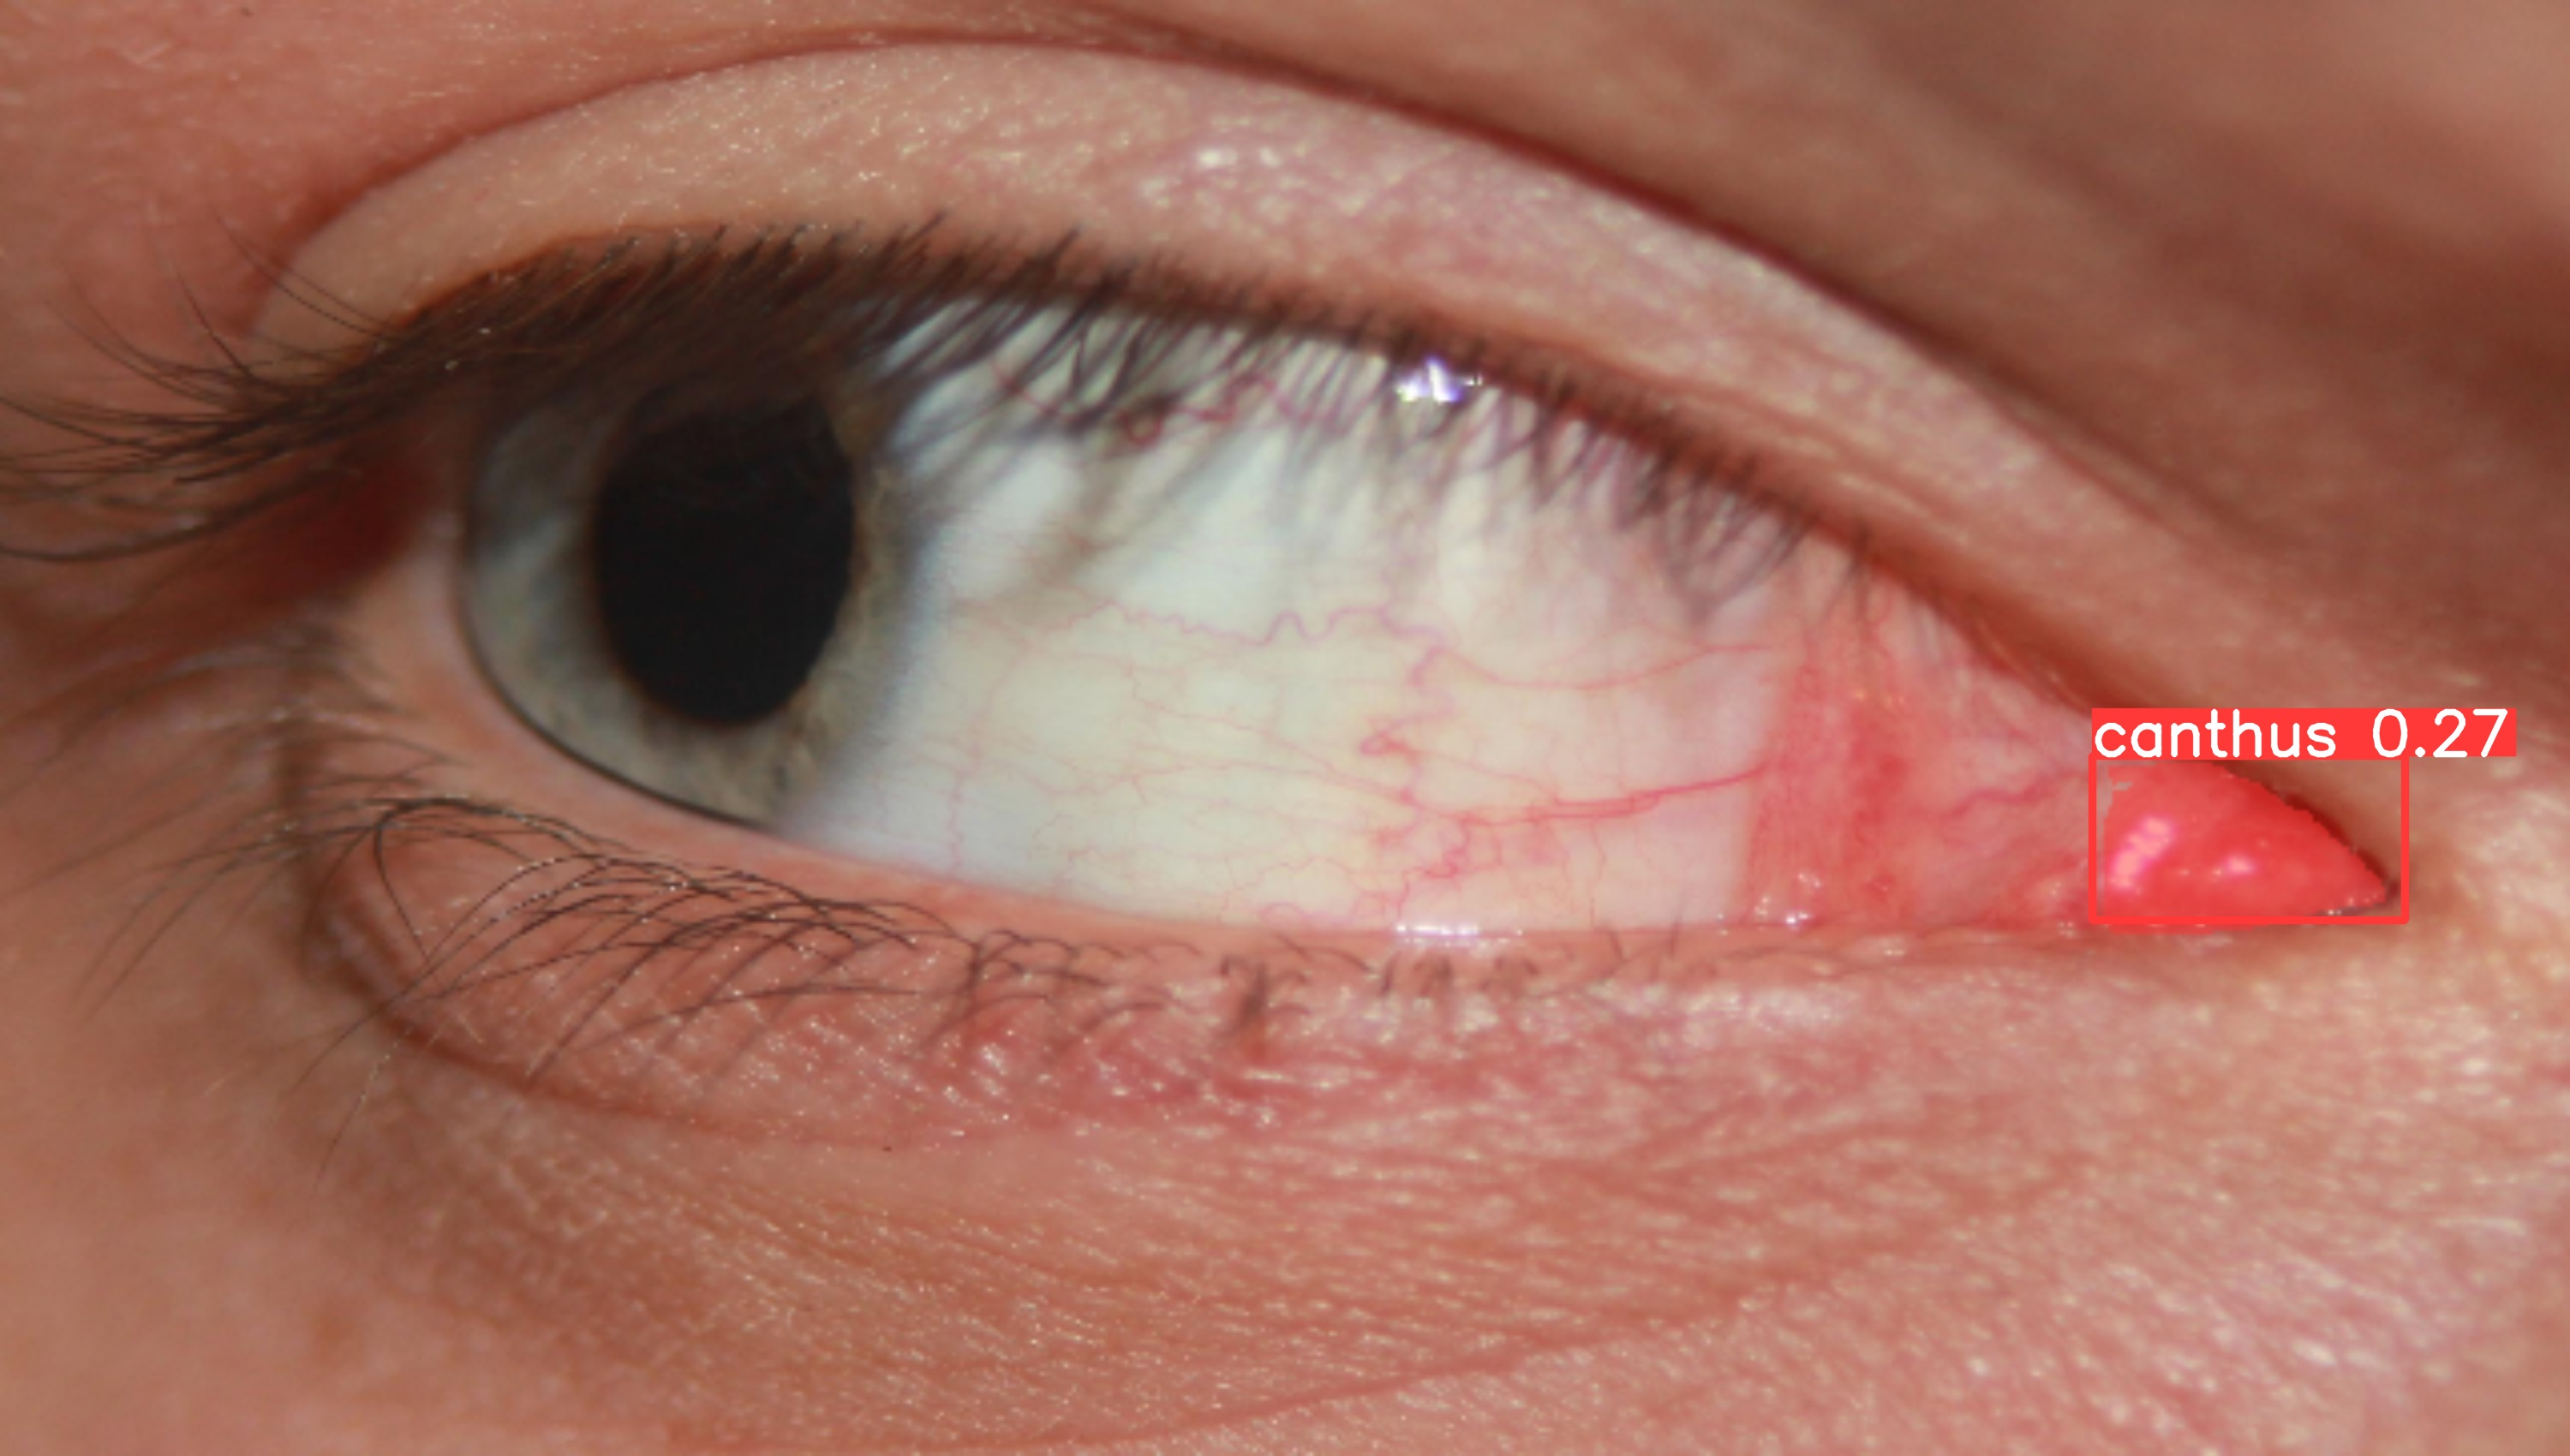

# セグメンテーションされた座標の抽出しようとしたが、うまくいかなかった。失敗作



0: 384x640 (no detections), 199.3ms
Speed: 3.7ms preprocess, 199.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
セグメンテーションが検出されませんでした。


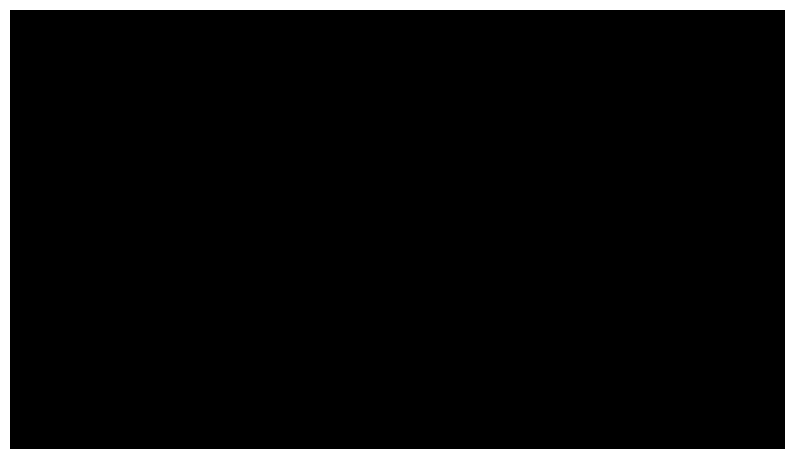

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/ultralytics/runs/segment/predict/10L_l_1.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# セグメンテーションの予測を実行
results = model(image_rgb)[0]

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros_like(image_rgb)

# セグメンテーションされた領域を白色に設定
if hasattr(results, 'masks') and results.masks is not None:
    for mask in results.masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        masked_image[mask_np == 1] = 255  # マスクの部分を白に設定
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()



WARNING ⚠️ imgsz=[3000, 1700] must be multiple of max stride 32, updating to [3008, 1728]
0: 992x1728 (no detections), 1165.0ms
Speed: 28.0ms preprocess, 1165.0ms inference, 0.8ms postprocess per image at shape (1, 3, 992, 1728)
セグメンテーションが検出されませんでした。


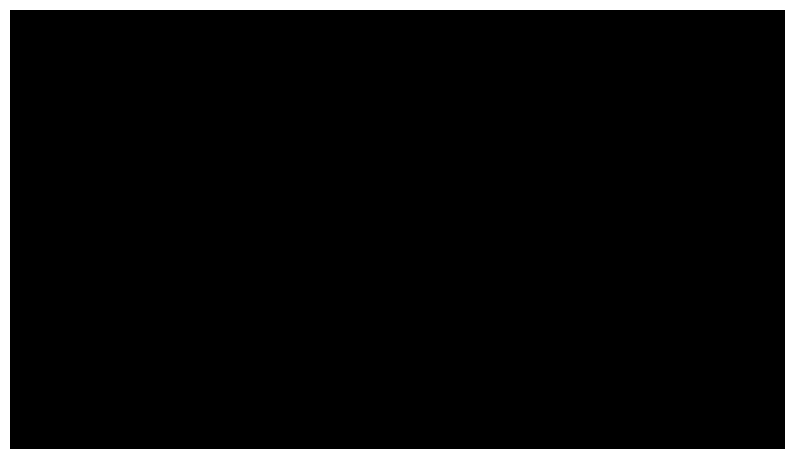

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_shape = image.shape[:2]  # 元の画像のサイズを保持

# セグメンテーションの予測を実行
results = model.predict(image_rgb, imgsz=original_shape[::-1])  # 画像サイズを元の画像サイズに合わせる

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros_like(image_rgb)

# セグメンテーションされた領域を白色に設定
if hasattr(results[0], 'masks') and results[0].masks is not None:
    for mask in results[0].masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        masked_image[mask_np == 1] = 255  # マスクの部分を白に設定
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()



WARNING ⚠️ imgsz=[3000, 1700] must be multiple of max stride 32, updating to [3008, 1728]
0: 992x1728 (no detections), 1181.1ms
Speed: 22.8ms preprocess, 1181.1ms inference, 0.7ms postprocess per image at shape (1, 3, 992, 1728)
セグメンテーションが検出されませんでした。


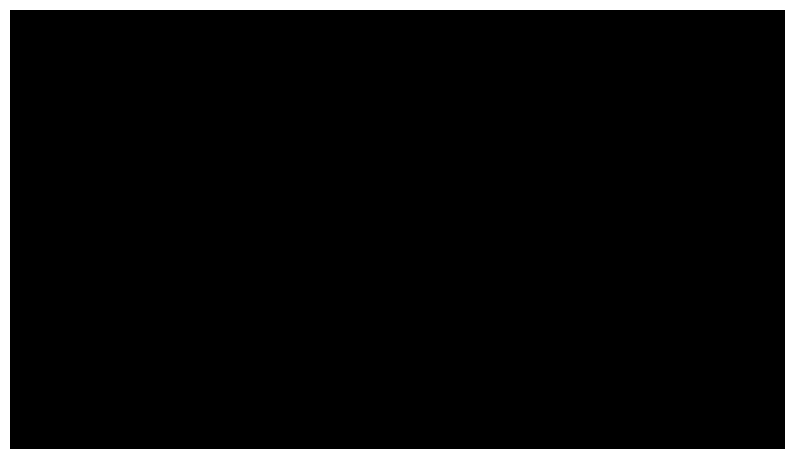

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image file: {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_shape = image.shape[:2]  # 元の画像のサイズを保持

# セグメンテーションの予測を実行
results = model.predict(image_rgb, imgsz=original_shape[::-1])

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros((original_shape[0], original_shape[1], 3), dtype=np.uint8)

# セグメンテーションされた領域を白色に設定
if results[0].masks is not None:
    for mask in results[0].masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        mask_resized = cv2.resize(mask_np, (original_shape[1], original_shape[0]))  # 元の画像サイズにリサイズ
        masked_image[mask_resized == 1] = [255, 255, 255]  # マスクの部分を白に設定
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()



WARNING ⚠️ imgsz=[3000, 1700] must be multiple of max stride 32, updating to [3008, 1728]
0: 992x1728 (no detections), 1389.2ms
Speed: 75.2ms preprocess, 1389.2ms inference, 0.9ms postprocess per image at shape (1, 3, 992, 1728)
セグメンテーションが検出されませんでした。


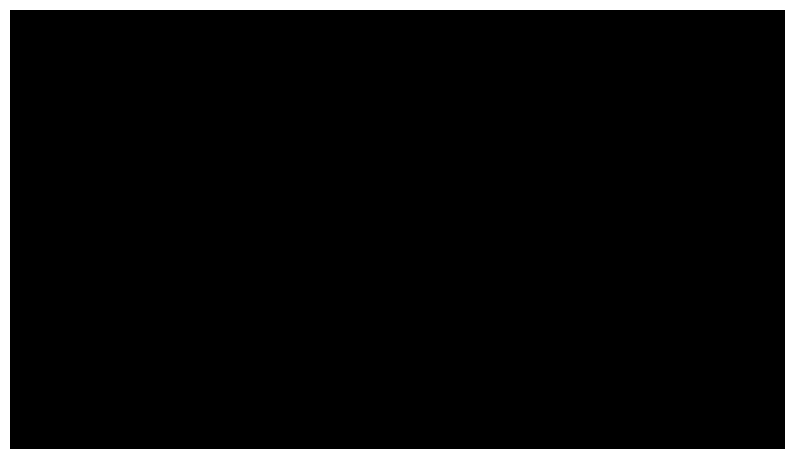

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image file: {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_shape = image.shape[:2]  # 元の画像のサイズを保持

# セグメンテーションの予測を実行
results = model.predict(image_rgb, imgsz=original_shape[::-1])

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros_like(image_rgb)

# セグメンテーションされた領域を白色に設定
if results[0].masks is not None:
    for mask in results[0].masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        mask_resized = cv2.resize(mask_np, (original_shape[1], original_shape[0]))  # 元の画像サイズにリサイズ
        masked_image[mask_resized == 1] = [255, 255, 255]  # マスクの部分を白に設定
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()



0: 384x640 (no detections), 347.7ms
Speed: 3.7ms preprocess, 347.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
セグメンテーションが検出されませんでした。


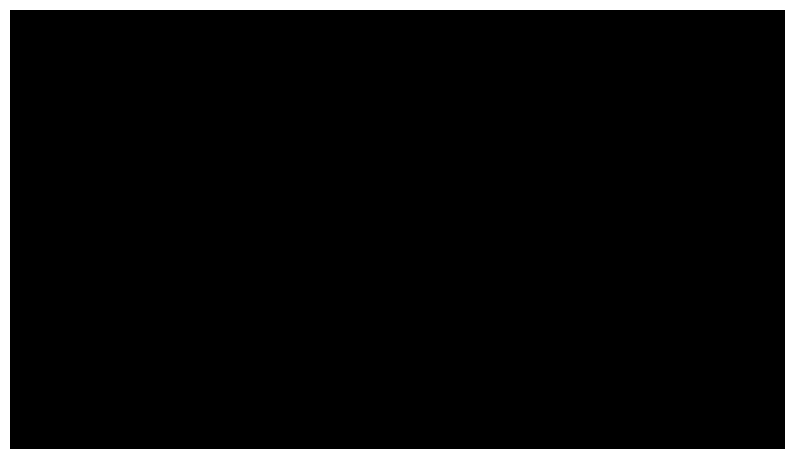

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image file: {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_shape = image.shape[:2]  # 元の画像のサイズを保持

# セグメンテーションの予測を実行
results = model.predict(source=image_rgb)

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros_like(image_rgb)

# セグメンテーションされた領域を白色に設定
if results[0].masks is not None:
    for mask in results[0].masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        mask_resized = cv2.resize(mask_np, (original_shape[1], original_shape[0]), interpolation=cv2.INTER_NEAREST)  # 元の画像サイズにリサイズ
        for i in range(3):  # RGBチャンネルすべてを更新
            masked_image[:, :, i] = np.where(mask_resized == 1, 255, masked_image[:, :, i])
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()



0: 384x640 (no detections), 396.2ms
Speed: 4.0ms preprocess, 396.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
セグメンテーションが検出されませんでした。


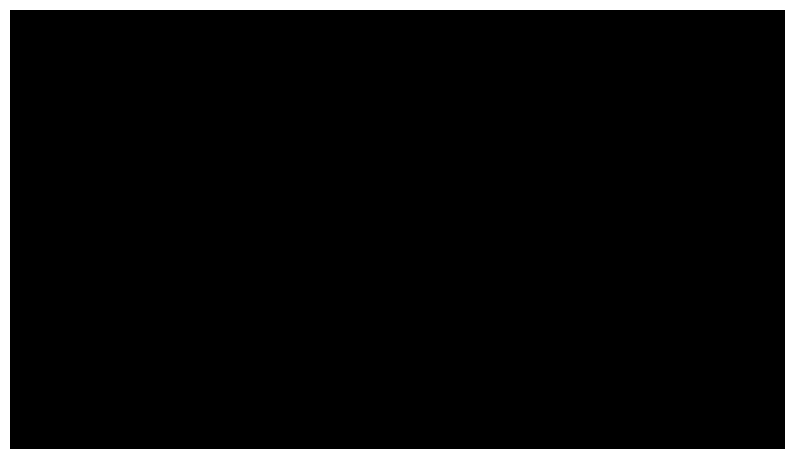

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image file: {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_shape = image.shape[:2]  # 元の画像のサイズを保持

# セグメンテーションの予測を実行
results = model.predict(source=image_rgb)

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros((original_shape[0], original_shape[1], 3), dtype=np.uint8)

# セグメンテーションされた領域を白色に設定
if results[0].masks is not None:
    mask = results[0].masks.data[0].cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
    mask_resized = cv2.resize(mask, (original_shape[1], original_shape[0]), interpolation=cv2.INTER_NEAREST)  # 元の画像サイズにリサイズ

    # マスクの部分を白に設定
    masked_image[mask_resized == 1] = [255, 255, 255]
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()


# 5/23セグメンテーションした箇所のみを白塗り成功！


image 1/1 /content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg: 384x640 1 canthus, 179.7ms
Speed: 3.9ms preprocess, 179.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


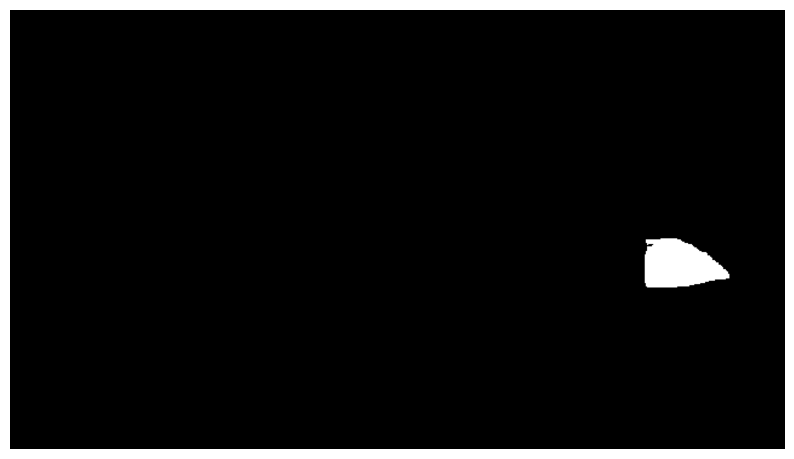

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image file: {image_path}")

# セグメンテーションの予測を実行
results = model(image_path)

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros(image.shape, dtype=np.uint8)

# セグメンテーションされた領域を白色に設定
if results[0].masks is not None:
    for mask in results[0].masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        mask_resized = cv2.resize(mask_np, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)  # 元の画像サイズにリサイズ
        masked_image[mask_resized == 1] = [255, 255, 255]  # マスクの部分を白に設定
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()


# Mobiusデータセットで試す。


image 1/1 /content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/1/1_1i_Ll_2.jpg: 384x640 (no detections), 181.7ms
Speed: 3.9ms preprocess, 181.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
セグメンテーションが検出されませんでした。


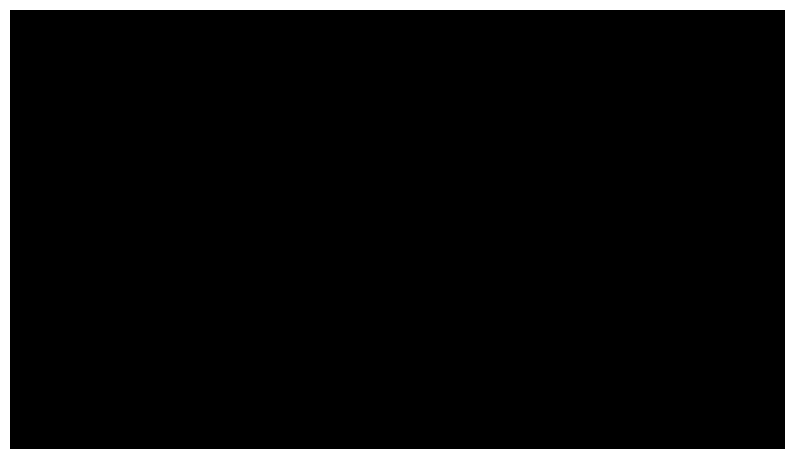

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/1/1_1i_Ll_2.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image file: {image_path}")

# セグメンテーションの予測を実行
results = model(image_path)

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros(image.shape, dtype=np.uint8)

# セグメンテーションされた領域を白色に設定
if results[0].masks is not None:
    for mask in results[0].masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        mask_resized = cv2.resize(mask_np, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)  # 元の画像サイズにリサイズ
        masked_image[mask_resized == 1] = [255, 255, 255]  # マスクの部分を白に設定
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()



image 1/1 /content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/10/10_1i_Ll_1.jpg: 384x640 (no detections), 289.6ms
Speed: 7.7ms preprocess, 289.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
セグメンテーションが検出されませんでした。


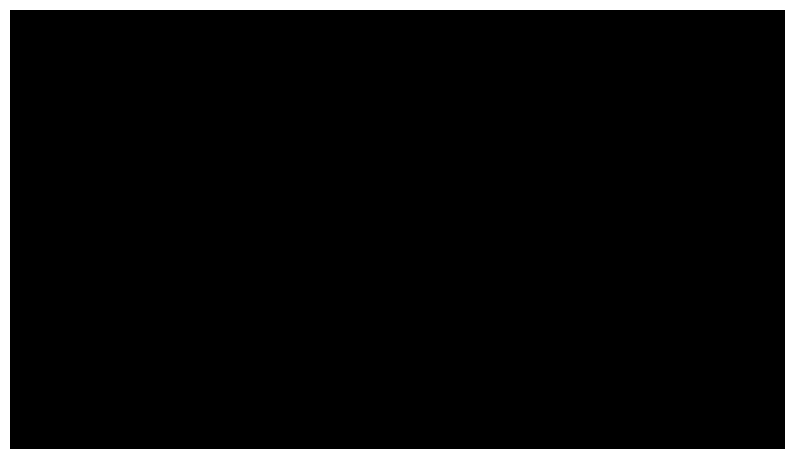

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/10/10_1i_Ll_1.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image file: {image_path}")

# セグメンテーションの予測を実行
results = model(image_path)

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros(image.shape, dtype=np.uint8)

# セグメンテーションされた領域を白色に設定
if results[0].masks is not None:
    for mask in results[0].masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        mask_resized = cv2.resize(mask_np, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)  # 元の画像サイズにリサイズ
        masked_image[mask_resized == 1] = [255, 255, 255]  # マスクの部分を白に設定
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()


## なぜかうまくいかないので、とりあえずセグメンテーションのみを実行してみる。

In [ ]:

model = YOLO("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt")  # load a pretrained model (recommended for training)

results = model("/content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/10/10_1i_Ll_1.jpg",save=True)


image 1/1 /content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/10/10_1i_Ll_1.jpg: 384x640 (no detections), 169.0ms
Speed: 3.9ms preprocess, 169.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/segment/predict2


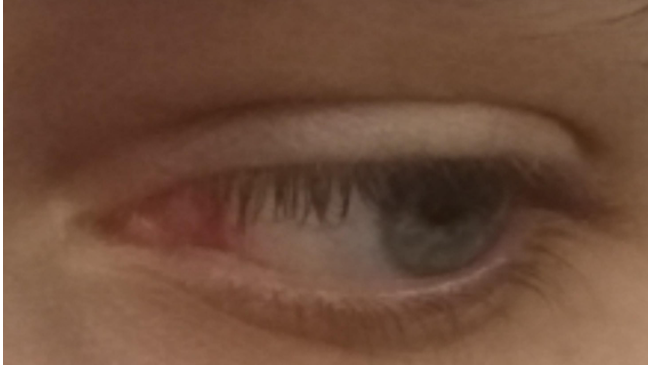

うまくいかなかった。
次の画像を試す。

In [ ]:
model = YOLO("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt")  # load a pretrained model (recommended for training)

results = model("/content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/100/100_1i_Ll_1.jpg",save=True)


image 1/1 /content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/100/100_1i_Ll_1.jpg: 384x640 (no detections), 154.4ms
Speed: 3.7ms preprocess, 154.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/segment/predict3


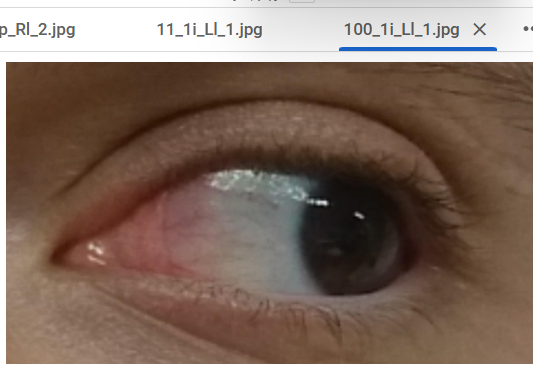

In [ ]:
model = YOLO("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt")  # load a pretrained model (recommended for training)

results = model("/content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/11/11_1i_Ll_1.jpg",save=True)


image 1/1 /content/drive/MyDrive/AI_laboratory_course/MOBIUS/Images/11/11_1i_Ll_1.jpg: 384x640 (no detections), 156.8ms
Speed: 2.8ms preprocess, 156.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/segment/predict4


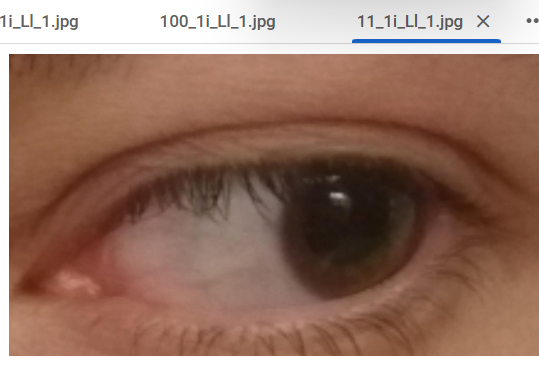

# Mobuisデータセットで四枚試したが、一枚もうまくいかなかった。SBVPIデータセットのほかの画像で試してみる。

In [ ]:
model = YOLO("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt")  # load a pretrained model (recommended for training)

results = model("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/11L_l_3.jpg",save=True)


image 1/1 /content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/11L_l_3.jpg: 384x640 4 canthuss, 157.6ms
Speed: 3.6ms preprocess, 157.6ms inference, 10.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/segment/predict5


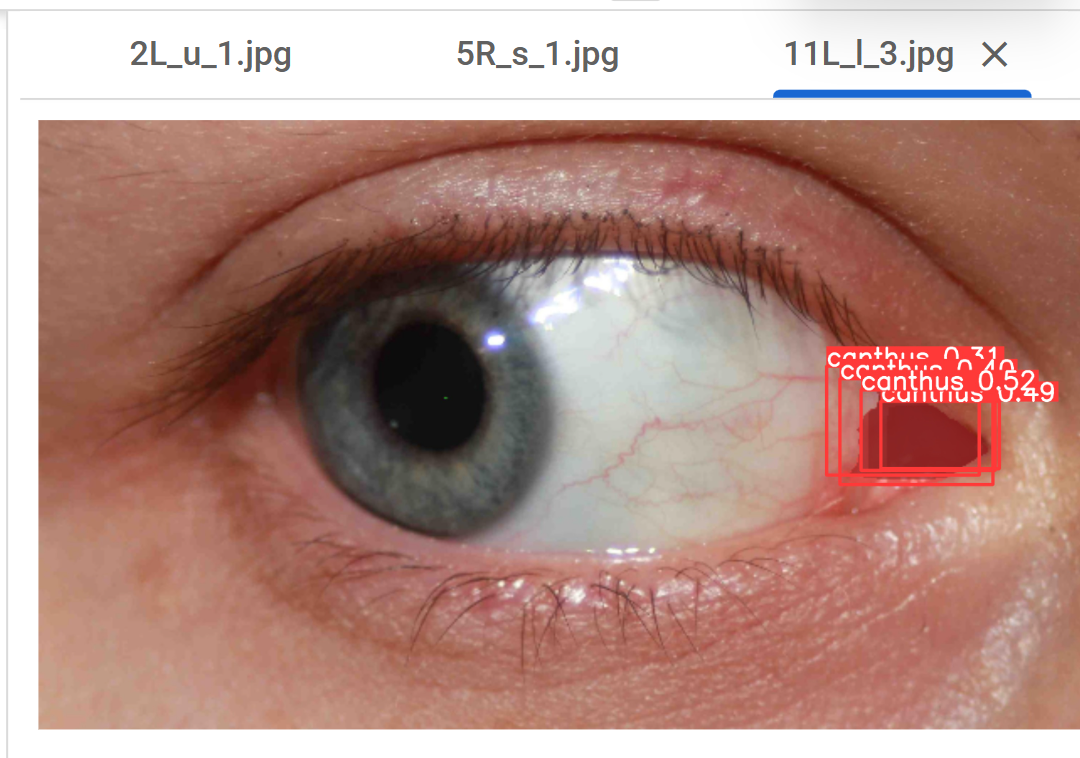

🤔なぜか重複して選択している！！

In [ ]:
model = YOLO("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt")  # load a pretrained model (recommended for training)

results = model("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/13R_l_1.jpg",save=True)


image 1/1 /content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/13R_l_1.jpg: 384x640 3 canthuss, 159.1ms
Speed: 2.9ms preprocess, 159.1ms inference, 11.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/segment/predict6


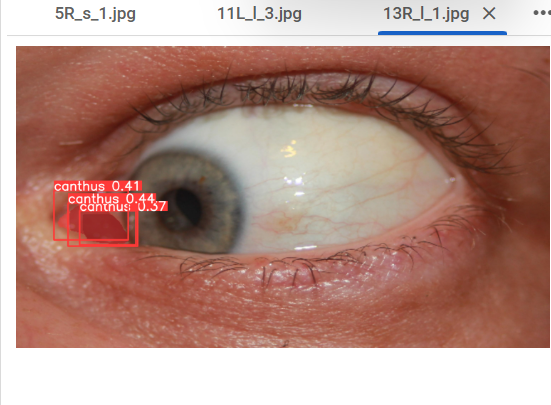

同じく重複している

In [ ]:
model = YOLO("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt")  # load a pretrained model (recommended for training)

results = model("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/2L_u_1.jpg",save=True)


image 1/1 /content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/2L_u_1.jpg: 384x640 1 canthus, 162.2ms
Speed: 2.7ms preprocess, 162.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/segment/predict7


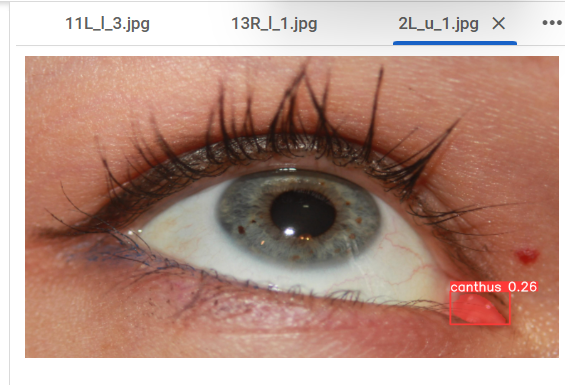

こちらの画像ではうまくいっている。

In [ ]:
model = YOLO("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt")  # load a pretrained model (recommended for training)

results = model("/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/5R_s_1.jpg",save=True)


image 1/1 /content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/5R_s_1.jpg: 384x640 2 canthuss, 165.1ms
Speed: 2.8ms preprocess, 165.1ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/segment/predict8


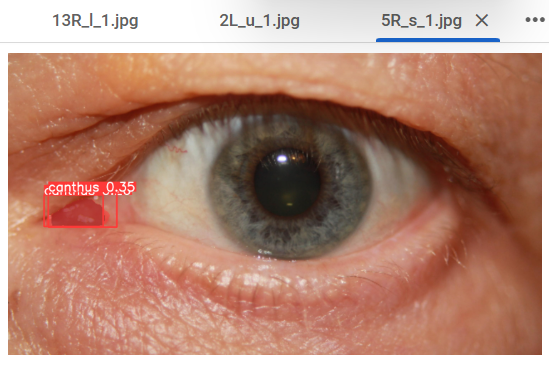

こちらの画像でもバウンディングボックスが重複している。

# 結論


*   SBVPIデータではセグメンテーションが行われている。
*   セグメンテーションが重複してしまう画像を発見した。

## やるべきこと

* Mobiusデータセットではセグメンテーションが行われない原因を考える。
  * データ数が足りず、過学習が起きている？
* セグメンテーションが重複してしまう原因を考える。
  * とりあえず、ChatGPTに聞いてみる。



# 重複したセグメンテーションを排除するコードを試してみる。


image 1/1 /content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg: 384x640 1 canthus, 321.5ms
Speed: 3.8ms preprocess, 321.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


<ipython-input-28-e94fc7055ebe>:31: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  mask_str = mask_resized.tostring()


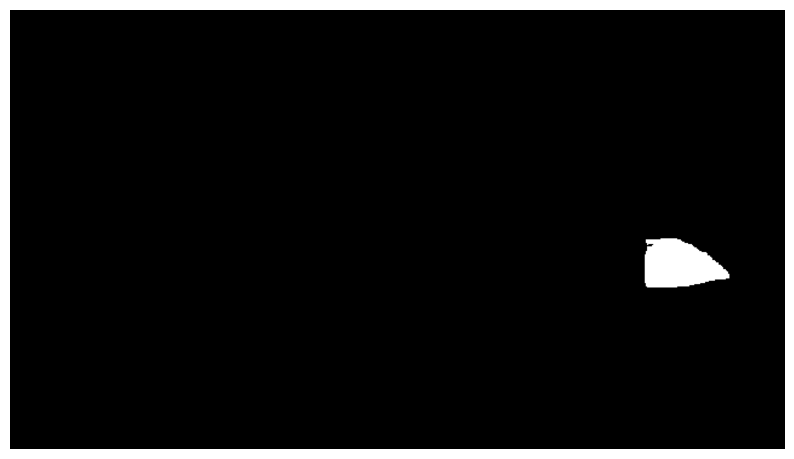

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt'
model = YOLO(model_path)

# 画像の読み込み
image_path = '/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/10L_l_1.jpg'
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image file: {image_path}")

# セグメンテーションの予測を実行
results = model(image_path)

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros(image.shape, dtype=np.uint8)

# セグメンテーションされた領域を白色に設定
if results[0].masks is not None:
    # 各マスクを一意に管理するためのセット
    unique_masks = set()
    for mask in results[0].masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        mask_resized = cv2.resize(mask_np, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)  # 元の画像サイズにリサイズ

        # マスクを一意のキーとして扱うために、バイナリの文字列に変換してセットに追加
        mask_str = mask_resized.tostring()
        if mask_str not in unique_masks:
            unique_masks.add(mask_str)
            masked_image[mask_resized == 1] = [255, 255, 255]  # マスクの部分を白に設定
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()


これは、全て白塗りされているため、重複を消せているのか分からない。


image 1/1 /content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/11L_l_3.jpg: 384x640 4 canthuss, 241.4ms
Speed: 3.9ms preprocess, 241.4ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/segment/predict9


<ipython-input-29-a457ca1d2581>:33: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  mask_str = mask_resized.tostring()


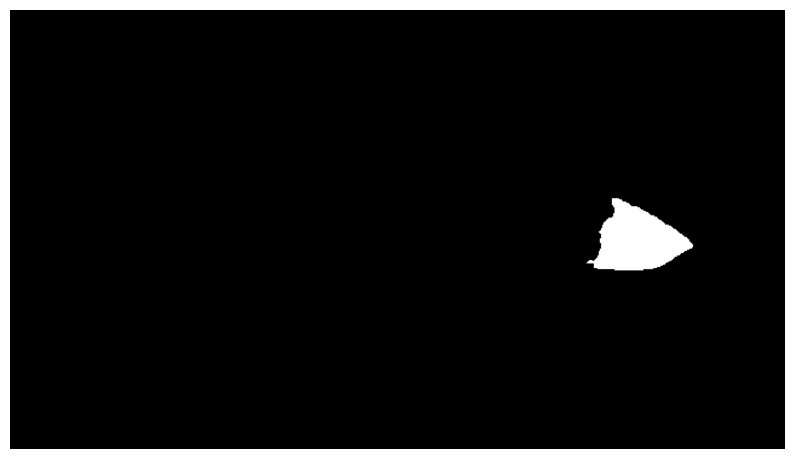

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# モデルの読み込み
model_path = "/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/result/custom_train_revised4/weights/best.pt"
model = YOLO(model_path)  # load a pretrained model (recommended for training)

# 画像の読み込みと予測の実行
image_path = "/content/drive/MyDrive/AI_laboratory_course/SBVPI/yolov8/dataset/images/train/11L_l_3.jpg"
results = model(image_path, save=True)

# 画像の読み込み
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load the image file: {image_path}")

original_shape = image.shape[:2]  # 元の画像のサイズを保持

# マスク画像の初期化（全体を黒に設定）
masked_image = np.zeros((original_shape[0], original_shape[1], 3), dtype=np.uint8)

# セグメンテーションされた領域を白色に設定
if results[0].masks is not None:
    # 各マスクを一意に管理するためのセット
    unique_masks = set()
    for mask in results[0].masks.data:
        mask_np = mask.cpu().numpy().astype('uint8')  # マスクをNumPy配列に変換
        mask_resized = cv2.resize(mask_np, (original_shape[1], original_shape[0]), interpolation=cv2.INTER_NEAREST)  # 元の画像サイズにリサイズ

        # マスクを一意のキーとして扱うために、バイナリの文字列に変換してセットに追加
        mask_str = mask_resized.tostring()
        if mask_str not in unique_masks:
            unique_masks.add(mask_str)
            masked_image[mask_resized == 1] = [255, 255, 255]  # マスクの部分を白に設定
else:
    print("セグメンテーションが検出されませんでした。")

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.show()


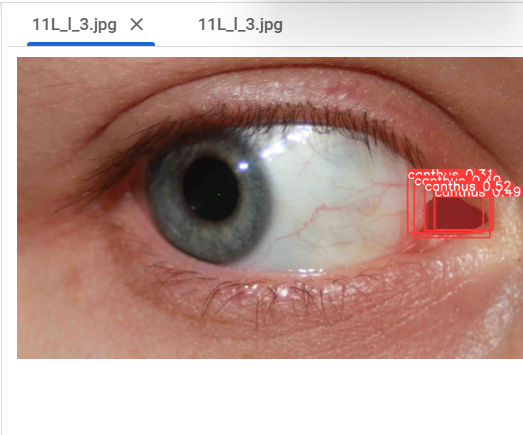

## バウンディングボックスが重複してしまっているが、涙丘を白塗りにすることは成功しているので、そこまで気にする必要はないかもしれない。🤔